# Aircraft Crashes Data Analysis and Visualization

## Overview

This notebook analyses the data and provides insights about the aircraft crashes since 1970.

### About Dataset

`date` date of the accident<br>
`category` category of the accident<br>     
`type` aircraft make and model<br>      
`operator` operator of the aircraft<br>
`yom` year of manufacture<br>
`engine` type of engine<br>
`engine_model` make and model of engine<br>
`flight_phase` phase of the flight when the accident occured<br>
`flight_type` type of flight (ex: military)<br>     
`site` type of location where the accident happened (ex: mountains)<br>
`location` location of the accident<br>      
`country` country where the crash happened<br>  
`region` region of the world where the crash happened<br>
`latitude` latitude of the location of the accident<br>
`longitude` longitude of the location of the accident<br>
`aircraft_damage` severity of the damage<br>
`occupants` number of crew members and passengers on board<br>
`fatalities` number of crew members and passengers who died<br>
`other_fatalities` other victims of the accident outside of the aircraft       

---

## Exploratory Data Analysis

1. Number of accidents over the years
2. Average number of accidents and fatalities per year 
3. Number of accidents by site
4. Number of accidents by cause
5. Top 5 commercial airline companies with the most accidents
6. Number of fatalities over the years
7. Top 5 deadliest accidents involving a single aircraft
8. Top 5 deadliest accidents involving more than one aircraft
9. Proportion of accidents with survivors
10. Get correlation between numeric values

In [46]:
from datetime import datetime
from IPython.core.display import Image
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns

In [47]:
# Load data
with open('data/cleaned_data.pkl', 'rb') as handle:
	df = pickle.load(handle)
df.head(5)

,date,category,type,operator,yom,engine,engine_model,flight_phase,flight_type,site,location,country,region,latitude,longitude,aircraft_damage,occupants,fatalities,other_fatalities,cause
0,1970-01-02,Accident,Douglas DC-3,Xieng Khouang Air Transport,1951,Multi Piston Engines,Unknown,Landing (descent or approach),Cargo,Mountains,"Long Tieng, Vientiane Province",Laos,Asia,20.017111,103.378253,Destroyed,4,4,0,Unknown
1,1970-01-02,Accident,Lockheed 18 LodeStar,Sky King Inc.,1943,Multi Piston Engines,Unknown,Takeoff (climb),Training,Airport (less than 10 km from airport),"North Little Rock-Municipal, Arkansas",United States of America,North America,34.832246,-92.259758,Destroyed,2,0,0,Human factor
2,1970-01-03,Unknown,Fairchild C-123 Provider,United States Air Force - USAF (since 1947),1954,Unknown,Unknown,Landing (descent or approach),Military,Airport (less than 10 km from airport),"Phan Rang, Ninh Thuận Province",Vietnam,Asia,11.576983,108.986539,Unknown,5,0,0,Technical failure
3,1970-01-05,Accident,Fokker F27 Friendship,Iberia - Lineas Aéreas de Espana,1968,Multi Turboprop Engines,Unknown,Landing (descent or approach),Scheduled Revenue Flight,Airport (less than 10 km from airport),"La Palma (La Palma Island), Canary Islands",Spain,Europe,28.655116,-17.857269,Destroyed,49,0,0,Unknown
4,1970-01-05,Accident,Convair CV-990,Spantax,1962,Multi Jet Engines,General Electric CJ805-23,Takeoff (climb),Positioning,Airport (less than 10 km from airport),"Stockholm-Arlanda, Uppland",Sweden,Europe,59.674971,14.520858,Destroyed,10,5,0,Human factor


### Number of accidents over the years

In [48]:
# Get the 5 years with the most accidents
crashes_per_year = df.groupby(df['date'].dt.year).size()
crashes_per_year.nlargest(n=5)

date
1978    406
1979    379
1980    378
1972    376
1977    372
dtype: int64

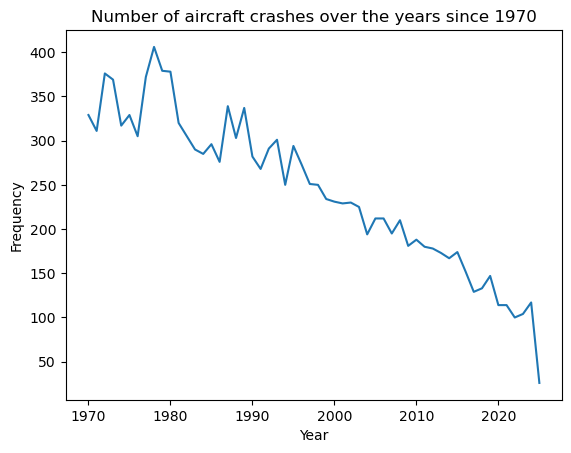

In [49]:
# Visualization of crashes over the years
ax = sns.lineplot(crashes_per_year)
ax.set_title('Number of aircraft crashes over the years since 1970')
ax.set_xlabel('Year')
ax.set_ylabel('Frequency');

### Average number of accidents and fatalities per year 

In [50]:
this_year = datetime.today().year
earliest_year = df['date'].dt.year.min()
total_years = this_year - earliest_year

In [51]:
print(f'Average number of crashes per year: {len(df) / total_years:.2f}')
print(f'Average number of fatalities per year: {df['fatalities'].sum() / total_years:.2f}')

Average number of crashes per year: 247.84
Average number of fatalities per year: 1579.96


### Number of accidents by site

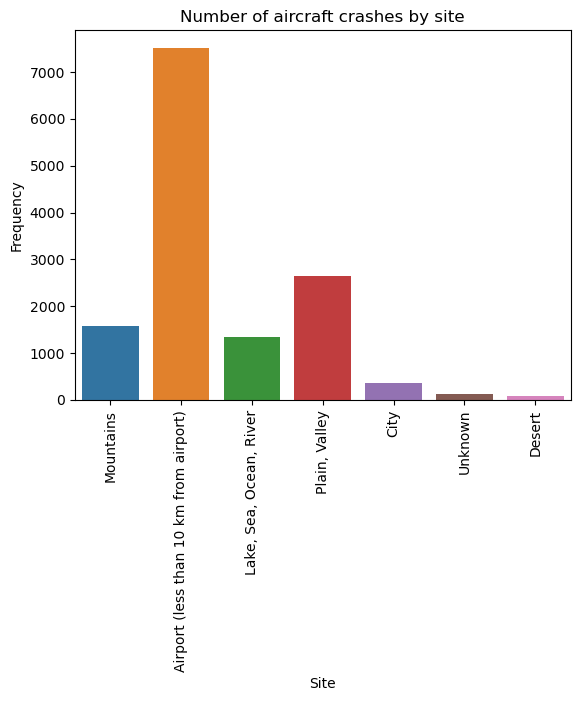

In [52]:
# Visualization
ax = sns.countplot(data=df, x='site', hue='site')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of aircraft crashes by site')
ax.set_xlabel('Site')
ax.set_ylabel('Frequency');

In [53]:
# Get flight phases of the accidents happening close to an airport
airport = df[df['site'].str.contains('Airport')]
airport['flight_phase'].value_counts()

flight_phase
Landing (descent or approach)    4650
Takeoff (climb)                  2412
Flight                            182
Taxiing                           132
Parking                            72
Unknown                            68
Name: count, dtype: int64

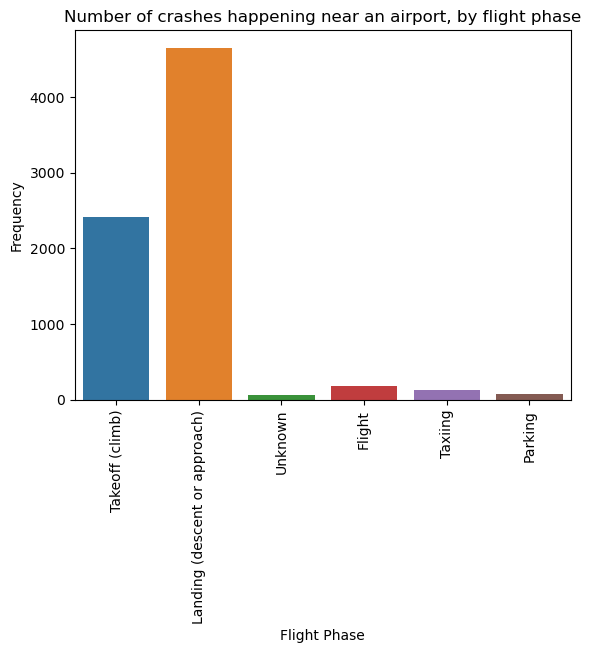

In [54]:
# Visualization
ax = sns.countplot(data=airport, x='flight_phase', hue='flight_phase')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of crashes happening near an airport, by flight phase')
ax.set_xlabel('Flight Phase')
ax.set_ylabel('Frequency');

This shows that most dangerous phases of a flight are the landing and the takeoff.

### Number of accidents by cause

In [55]:
# Data
df['cause'].value_counts(normalize=True)

cause
Human factor                                                      0.473553
Technical failure                                                 0.222654
Unknown                                                           0.212310
Weather                                                           0.039175
Other causes                                                      0.028244
Terrorism act, hijacking, sabotage, any kind of hostile action    0.024063
Name: proportion, dtype: float64

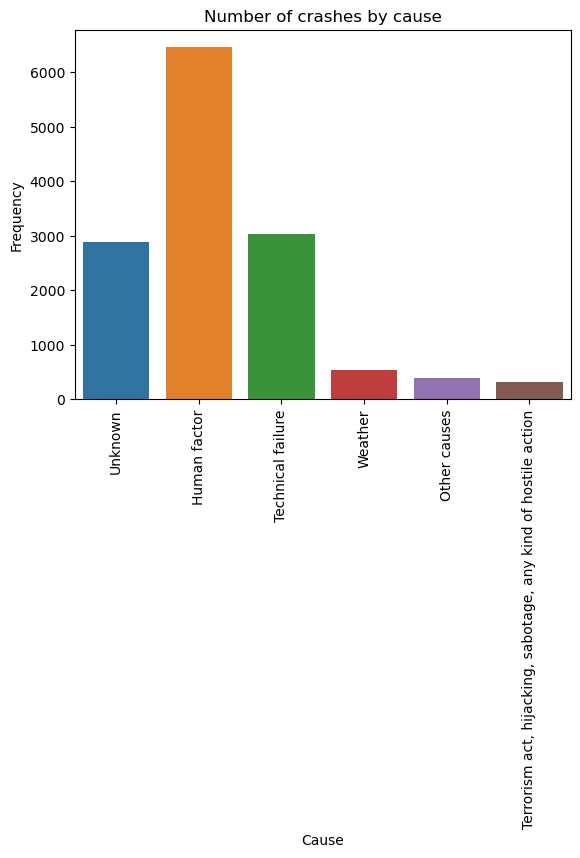

In [56]:
# Visualization
ax = sns.countplot(data=df, x='cause', hue='cause')
ax.tick_params(axis='x', rotation=90)
ax.set_title('Number of crashes by cause')
ax.set_xlabel('Cause')
ax.set_ylabel('Frequency');

It's interesting to see that almost half of the accidents are cause by human error.

### Top 5 commercial airline companies with the most accidents

In [57]:
df[df['flight_type'].str.contains('Revenue Flight')]['operator'].value_counts().head()

operator
Aeroflot - Russian International Airlines    526
Merpati Nusantara Airlines - MNA              30
Indian Airlines                               25
Ethiopian Airlines                            22
Pakistan International Airlines - PIA         20
Name: count, dtype: int64

There's a big diffrence with the number of accidents from Aeroflot compared to the others, which gives the perception of the airline company not being safe.

###  Number of fatalities over the years

In [58]:
# Get the 5 years with the most fatalities
deaths_per_year = df.groupby(df['date'].dt.year)['fatalities'].sum()
deaths_per_year.nlargest(n=5)

date
1972    3338
1985    3014
1973    2923
1974    2780
1977    2554
Name: fatalities, dtype: int64

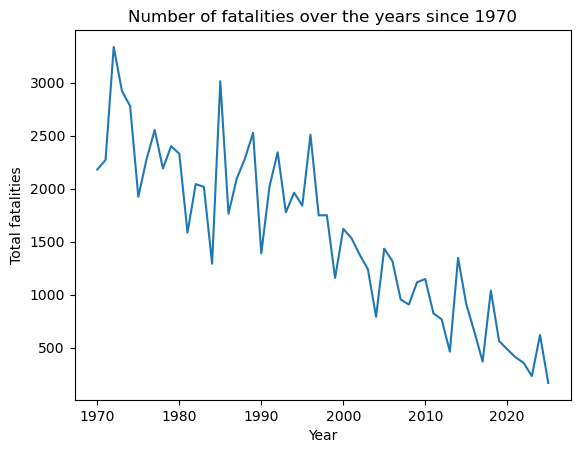

In [59]:
# Visualization
ax = sns.lineplot(deaths_per_year)
ax.set_title('Number of fatalities over the years since 1970')
ax.set_xlabel('Year')
ax.set_ylabel('Total fatalities');

### Top 5 deadliest accidents involving a single aircraft

In [60]:
df.nlargest(n=5, columns='fatalities') \
	[['date', 'type', 'operator', 'location', 'country', 'site', 'fatalities']]

,date,type,operator,location,country,site,fatalities
5247,1985-08-12,Boeing 747-200,Japan Airlines,"Mt Osutaka, Kantō",Japan,Mountains,520
1442,1974-03-03,Douglas DC-10,Turkish Airlines - THY Türk Hava Yollari,"Ermenonville, Oise",France,"Plain, Valley",346
2422,1977-03-27,Boeing 747-100,Pan American World Airways - PAA,"Tenerife-Norte-Los Rodeos, Canary Islands",Spain,Airport (less than 10 km from airport),335
5204,1985-06-23,Boeing 747-200,Air India,"Atlantic Ocean, All World",World,"Lake, Sea, Ocean, River",329
8540,1996-11-12,Boeing 747-100,Saudi Arabian Airlines - SAUDIA,"Charkhi Dadri, Haryana",India,"Plain, Valley",312


The deadliest aviation accident involving a single plane happened in August 12th 1985 in Japan, with 520 fatalities.

In [61]:
# Display accident
display(Image(url='https://www.baaa-acro.com/sites/default/files/crash/images/JA8119-2.jpg', width=500, unconfined=True, alt='JL123 Crash in 1985'))

### Top 5 deadliest accidents involving more than one aircraft

In [62]:
# Get accidents involving multiple aircrafts
result = df.groupby(['date', 'location']).agg(nb_aircrafts=('date', 'size'), fatalities=('fatalities', 'sum'))
result[result['nb_aircrafts'] > 1].nlargest(n=5, columns='fatalities')


,,nb_aircrafts,fatalities
date,location,,
1977-03-27,"Tenerife-Norte-Los Rodeos, Canary Islands",2,583
1996-11-12,"Charkhi Dadri, Haryana",2,349
1979-08-11,"Kurilovka, Dnipropetrovsk Oblast",2,178
1976-09-10,"Vrbovec, Zagreb County",2,176
2001-09-11,"New York, New York",2,157


The deadliest aircraft accident involving more than one plane is the collision between two Boeing-747 planes in March 27th 1977 in the Canary Islands, where 583 people were killed. Because of the number of fatalities, this makes it the worst accident ever of the aviation history.

In [63]:
# Display two planes involved in accident
display(Image(url='https://www.baaa-acro.com/sites/default/files/crash/images/PH-BUF-9.jpg', width=500, unconfined=True, alt='KLM plane crash in March 27th 1977'))
display(Image(url='https://www.baaa-acro.com/sites/default/files/crash/images/N736PA-8.jpg', width=500, unconfined=True, alt='Pan Am plane crash in March 27th 1977'))

### Proportion of accidents with survivors

In [64]:
# Get ratio of accidents where all people survived
all_survived_mask = df['fatalities'] == 0

ratio_no_deaths = pd.Series({
  True: len(df[all_survived_mask]) / len(df),
  False: len(df[~all_survived_mask]) / len(df)
})
ratio_no_deaths

True     0.428729
False    0.571271
dtype: float64

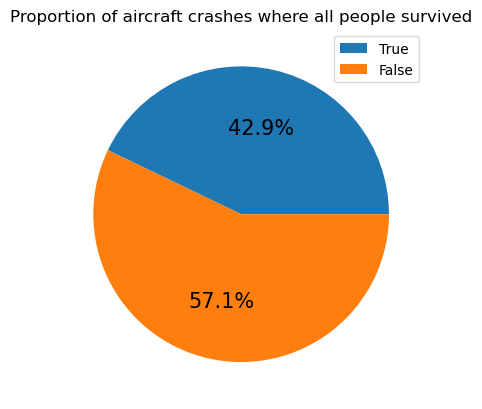

In [65]:
# Visualization
plt.pie(ratio_no_deaths, autopct='%.1f%%', textprops={'fontsize': 15})
plt.legend(labels=ratio_no_deaths.index)
plt.title('Proportion of aircraft crashes where all people survived')
plt.show()

### Correlation between numeric values

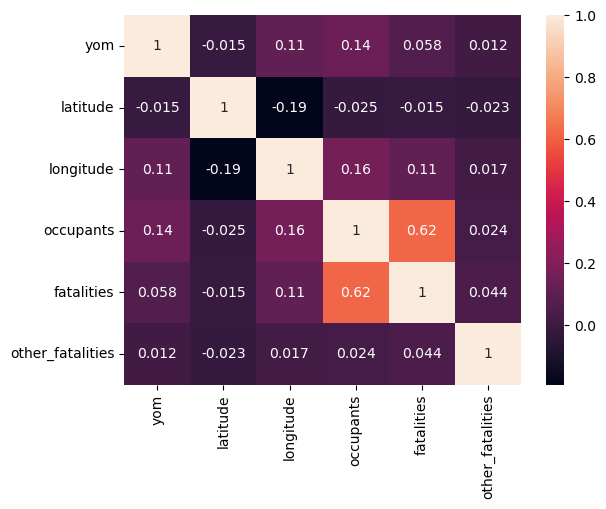

In [66]:
# Heatmap
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True);

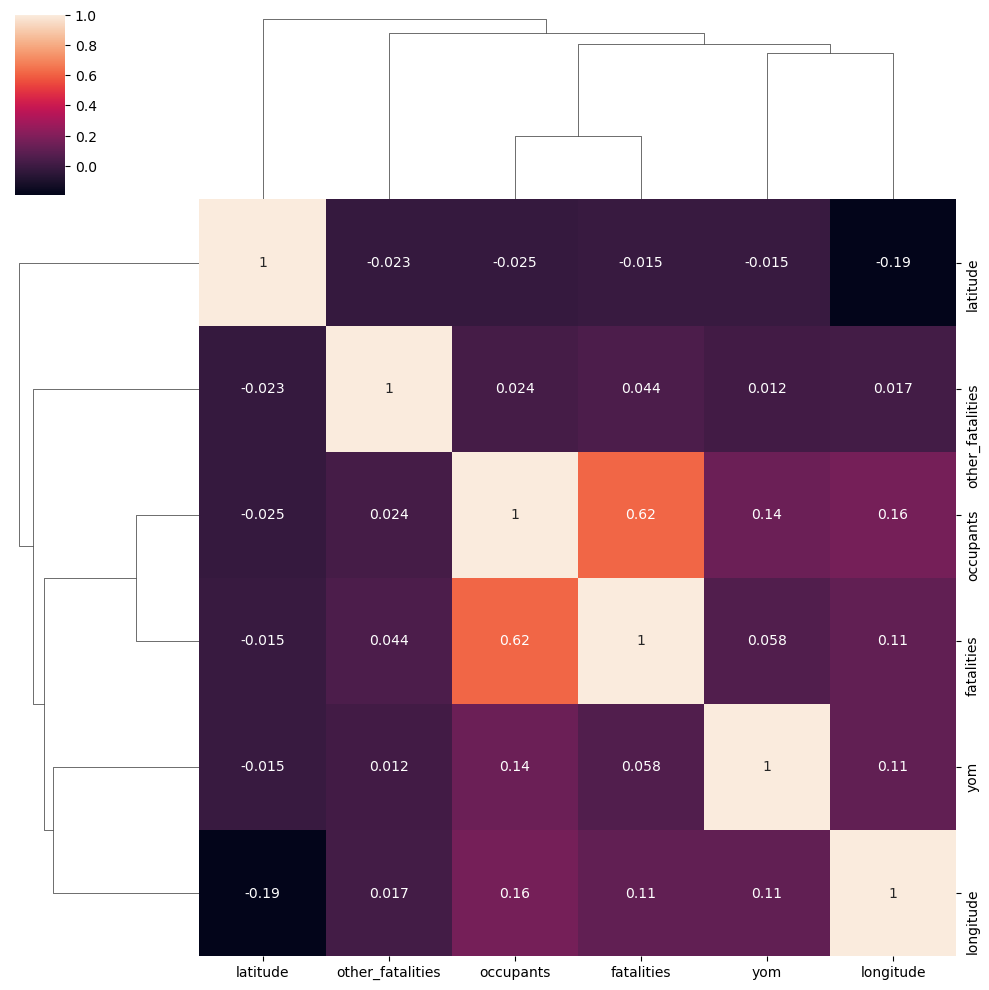

In [67]:
# Clustermap
sns.clustermap(corr_matrix, annot=True);

## End